# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Pre-installing Custom Functions

In [5]:
sys.path.append("../")

In [6]:
from Modules import *

# Practicing in Stages

## Making Predictions

In [7]:
def forward(x):
    y = w * x + b
    return y


tabulation = Form_Generator()
tabulation.heading_printer("Definition of the function of prediction")

definition_1 = """
def forward(x):
    y = w * x + b
    return y
"""
definitions = [definition_1]
tabulation.definition_generator(definitions)

Definition of the function of prediction

    +-------------------+
    | Definition        |
    +===================+
    | def forward(x):   |
    |     y = w * x + b |
    |     return y      |
    +-------------------+


In [8]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

tabulation = Form_Generator()
tabulation.heading_printer("Initial assignment of parameters")

statement_1 = "w = torch.tensor(3.0, requires_grad=True)"
statement_2 = "b = torch.tensor(1.0, requires_grad=True)"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["w", "b"]
values = [str(w), str(b)]
tabulation.variable_generator(variables, values)

Initial assignment of parameters

    +-------------------------------------------+
    | Statement                                 |
    +===========================================+
    | w = torch.tensor(3.0, requires_grad=True) |
    +-------------------------------------------+
    | b = torch.tensor(1.0, requires_grad=True) |
    +-------------------------------------------+
    +----------+--------------------------------+
    | Variable | Value                          |
    +----------+--------------------------------+
    | w        | tensor(3., requires_grad=True) |
    | b        | tensor(1., requires_grad=True) |
    +----------+--------------------------------+


In [9]:
x = torch.tensor(2)

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with 0D tensor")

statement_1 = "x = torch.tensor(2)"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with 0D tensor

    +---------------------+
    | Statement           |
    +=====================+
    | x = torch.tensor(2) |
    +---------------------+
    +----------+-----------+
    | Variable | Value     |
    +----------+-----------+
    | x        | tensor(2) |
    +----------+-----------+
    +------------+------------------------------------+
    | Expression | Result                             |
    +------------+------------------------------------+
    | forward(x) | tensor(7., grad_fn=<AddBackward0>) |
    +------------+------------------------------------+


In [10]:
x = torch.tensor([[4], [7]])

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with multi-D tensor")

statement_1 = "x = torch.tensor([[4], [7]])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with multi-D tensor

    +------------------------------+
    | Statement                    |
    +==============================+
    | x = torch.tensor([[4], [7]]) |
    +------------------------------+
    +----------+---------------+
    | Variable | Value         |
    +----------+---------------+
    | x        | tensor([[4],  |
    |          |         [7]]) |
    +----------+---------------+
    +------------+-----------------------------------------+
    | Expression | Result                                  |
    +------------+-----------------------------------------+
    | forward(x) | tensor([[13.],                          |
    |            |         [22.]], grad_fn=<AddBackward0>) |
    +------------+-----------------------------------------+


## Linear Class

In [11]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of standard linear model")

statement_1 = "torch.manual_seed(1)"
statement_2 = "model = nn.Linear(in_features=1, out_features=1)"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.weight", "model.bias"]
results = [str(model.weight), str(model.bias)]
tabulation.expression_generator(expressions, results)

Initialization of standard linear model

    +--------------------------------------------------+
    | Statement                                        |
    +==================================================+
    | torch.manual_seed(1)                             |
    +--------------------------------------------------+
    | model = nn.Linear(in_features=1, out_features=1) |
    +--------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | model    | Linear(in_features=1, out_features=1, bias=True) |
    +----------+--------------------------------------------------+
    +--------------+----------------------------------------+
    | Expression   | Result                                 |
    +--------------+----------------------------------------+
    | model.weight | Parameter con

In [12]:
x = torch.tensor([2.0])

tabulation = Form_Generator()
tabulation.heading_printer("Model implementation with 1D tensor")

statement_1 = "x = torch.tensor([2.0])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Model implementation with 1D tensor

    +-------------------------+
    | Statement               |
    +=========================+
    | x = torch.tensor([2.0]) |
    +-------------------------+
    +----------+--------------+
    | Variable | Value        |
    +----------+--------------+
    | x        | tensor([2.]) |
    +----------+--------------+
    +------------+------------------------------------------+
    | Expression | Result                                   |
    +------------+------------------------------------------+
    | model(x)   | tensor([0.5891], grad_fn=<AddBackward0>) |
    +------------+------------------------------------------+


In [13]:
x = torch.tensor([[2.0], [3.3]])

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with multi-D tensor")

statement_1 = "x = torch.tensor([[2.0], [3.3]])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Function implementation with multi-D tensor

    +----------------------------------+
    | Statement                        |
    +==================================+
    | x = torch.tensor([[2.0], [3.3]]) |
    +----------------------------------+
    +----------+--------------------+
    | Variable | Value              |
    +----------+--------------------+
    | x        | tensor([[2.0000],  |
    |          |         [3.3000]]) |
    +----------+--------------------+
    +------------+----------------------------------------------+
    | Expression | Result                                       |
    +------------+----------------------------------------------+
    | model(x)   | tensor([[0.5891],                            |
    |            |         [1.2590]], grad_fn=<AddmmBackward0>) |
    +------------+----------------------------------------------+


## Custom Modules

In [14]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [15]:
results = [
    "123456789900123456789012345\n\t\t\t67891              2345678901234jjjjjjjjj 5678903456789\n\t\t4567894567895 678945678945678345678"
]


tabulation.definition_generator(results)

    +-------------------------------------------------------+
    | Definition                                            |
    +=======================================================+
    | 123456789900123456789012345                           |
    |             67891              2345678901234jjjjjjjjj |
    |         5678903456789                                 |
    |         4567894567895 678945678945678345678           |
    +-------------------------------------------------------+


In [16]:
results = [
"""
def ddd():\n\tddddf\n\tdddff\n\tdsffqf
"""
]
tabulation.definition_generator(results)

    +--------------+
    | Definition   |
    +==============+
    | def ddd():   |
    |     ddddf    |
    |     dddff    |
    |     dsffqf   |
    +--------------+


In [17]:
import re
from tabulate import tabulate
from termcolor import cprint

def tabulator_replacement(string, expandtabs):
    if len(re.findall(r"\t", string)) > 0:
        string = re.sub(r"\t", " " * expandtabs, string)
    return string

def string_trimmer(string, expandtabs):
    printable_lines = []
    string = tabulator_replacement(string, expandtabs)
    printable_line = string
    if len(string) > 59:
        printable_line = string
        while len(printable_line) > 59:
            while printable_line.rfind(" ") > 59:
                printable_line = printable_line[: printable_line.rfind(" ")]
            printable_line = printable_line[: printable_line.rfind(" ")]
            printable_lines.append(printable_line)
            string = string[len(printable_line) + 1 :]
            printable_line = string
    printable_lines.append(printable_line)
    return printable_lines


def statement_generator(statements):
    table = [["Statement"]]
    for statement in statements:
        printable_statement = string_trimmer(statement, 4)
        table.append(["\n\t".expandtabs(8).join(printable_statement)])
        
    """
    for statement in statements:
        if len(statement) > self.adjusted_width:
            printable_statement = ""
            printable_line = statement
            while len(statement) > self.adjusted_width:
                while printable_line.rfind(" ") > self.adjusted_width:
                    printable_line = printable_line[: printable_line.rfind(" ")]
                printable_line = printable_line[: printable_line.rfind(" ")]
                printable_statement += printable_line + "\n\t".expandtabs(8)
                statement = statement[len(printable_line) + 1 :]
                printable_line = statement
            printable_statement += printable_line
            table.append([printable_statement])
        else:
            table.append([statement])
    """
    table_list = tabulate(
        table, headers="firstrow", tablefmt="pretty", colalign=("left",)
    ).split("\n")
    for line in table_list:
        cprint("\t".expandtabs(4) + line, "red", attrs=["bold"])
        
statement_generator(results)


def tabulator_replacement(string, expandtabs):
    if len(re.findall(r"\t", string)) > 0:
        string = re.sub(r"\t", " " * expandtabs, string)
    return string

    +------------+
    | Statement  |
    +------------+
    | def ddd(): |
    |     ddddf  |
    |     dddff  |
    |     dsffqf |
    +------------+


In [18]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [19]:
print(model.parameters())

<generator object Module.parameters at 0x1667b09e0>


In [20]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [21]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [22]:
X = torch.randn(100, 1)
print(X[::10])

tensor([[-0.6540],
        [-0.2223],
        [-0.6629],
        [-0.7984],
        [-0.1578],
        [ 0.7626],
        [-3.3312],
        [ 0.9837],
        [-0.6540],
        [ 1.2466]])


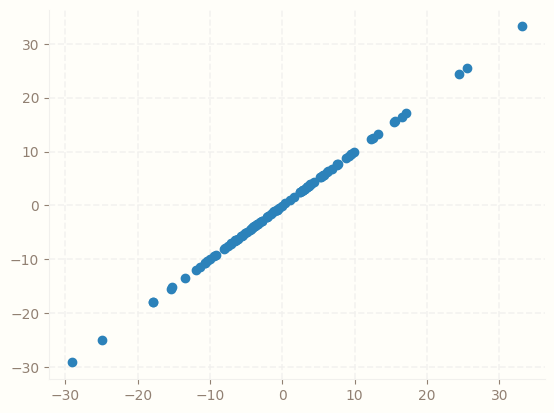

In [23]:
X = torch.randn(100, 1) * 10
y = X
colors = calm_color_generator(1)
plt.plot(X.numpy(), y.numpy(), "o", c=colors[0])

Text(0.5, 0, 'X')

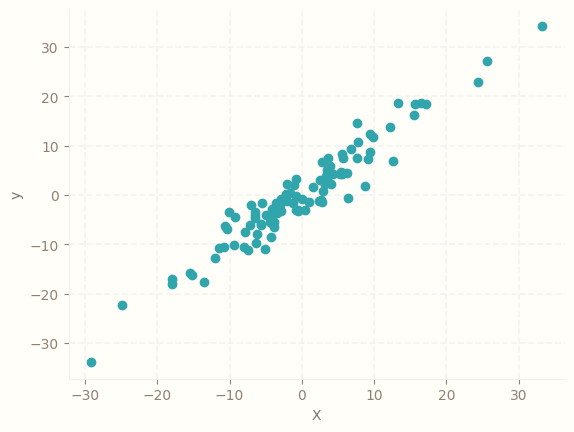

In [24]:
y = X + 3 * torch.randn(100, 1)
colors = calm_color_generator(1)
plt.plot(X.numpy(), y.numpy(), "o", c=colors[0])
plt.ylabel("y")
plt.xlabel("X")

In [25]:
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [26]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [27]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [28]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [29]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [30]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    colors = calm_color_generator(1)
    plt.scatter(X, y, color=colors[0])
    plt.show()

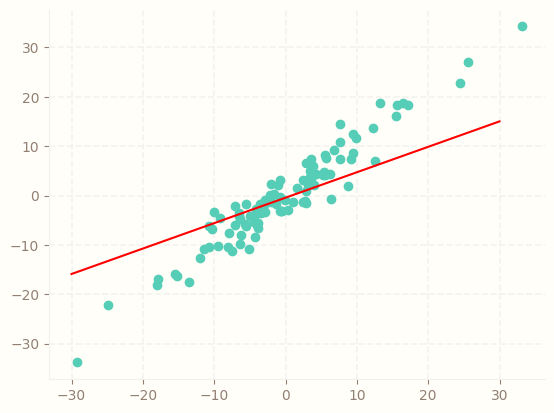

In [31]:
plot_fit("Initial Model")

# Training - Code Implementation

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002)

In [33]:
print(criterion)

MSELoss()


In [34]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0002
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [35]:
epochs = 100
losses = []
termcolors = [
    "grey", "red", "green", "yellow", "blue", "magenta", "cyan", "white"
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i == 1 or i % 10 == 0:
        print(colored("epoch:", font_colors[0], attrs=["bold"]), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NameError: name 'random' is not defined

In [ ]:
colors = calm_color_generator(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
plot_fit("Trained Model")